# BAFU dataset extraction

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the BAFU dataset into hourly and daily resolutions. The output is one file per catchemnt (similar to the CAMELS_CH), with 5 columns: date, electric_cond(µS/cm), pH(-), temperature(°C) & oxygen_conc(mg/l)

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* 

# Import modules

In [7]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import os
import glob
import warnings
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import glob
from matplotlib.lines import Line2D
import matplotlib as mpl



# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."
# Suppress all warnings
warnings.filterwarnings("ignore")

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = "results/timeseries/"

# Set the directory:
os.chdir(PATH)

In [4]:
os.getcwd()

'c:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Scripts\\CAMELS_CH_chem'

# Import data
* Full table

In [5]:
# Full dataset
path = r'data\phys_daten_BAFU\phys_daten_BAFU\\'

filenames = glob.glob(path + "*.csv")
len(filenames)

423

In [6]:
# Network CAMELS_CH_Chem
network_camels_ch_chem = pd.read_excel(r"data/CAMELS_CH_chem_stations_short_v2.xlsx", sheet_name='all_4')
#network_camels_ch_chem.set_index("basin_id", inplace=True)
network_camels_ch_chem

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lon_naduf,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,557660.0,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,657000.0,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,662830.0,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,663700.0,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN
115,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [11]:
# Create GeoDataFrame, specifying the geometry column with Point objects (lon, lat)
network_camels_ch_chem_gdf = gpd.GeoDataFrame(network_camels_ch_chem, geometry=gpd.points_from_xy(network_camels_ch_chem['lon'], network_camels_ch_chem['lat']), crs="EPSG:21781")  # Swiss CH1903/LV03 CRS

# Convert to WGS84 (EPSG:4326)
network_camels_ch_chem_gdf = network_camels_ch_chem_gdf.to_crs("EPSG:4326")

network_camels_ch_chem_gdf["x_coord"] = network_camels_ch_chem_gdf.geometry.x
network_camels_ch_chem_gdf["y_coord"] = network_camels_ch_chem_gdf.geometry.y

network_camels_ch_chem_gdf

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry,x_coord,y_coord
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN,POINT (6.88862 46.34956),6.888617,46.349564
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN,POINT (7.35791 46.21909),7.357908,46.219089
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN,POINT (8.19488 47.48254),8.194880,47.482537
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (8.27127 47.42103),8.271271,47.421030
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,POINT (8.09203 46.74574),8.092031,46.745743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (10.45316 46.62964),10.453157,46.629638
113,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (8.34980 46.53432),8.349802,46.534322
114,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN,POINT (8.27728 47.07063),8.277285,47.070628
115,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (8.76547 47.10646),8.765471,47.106463


In [18]:
network_camels_ch_chem_gdf.y_coord.min()

45.97199536210988

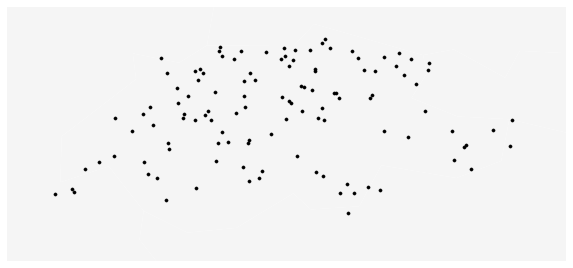

In [29]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Create a 2x1 subplot grid
fig, axs = plt.subplots(1, 1, figsize=(8, 5))

# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs, facecolor='whitesmoke', edgecolor='none', linewidth=0.1)
#axs.set_xlim(-24, 45) 
#axs.set_ylim(35, 70)  

#catchment_boundaries.plot(ax=axs, facecolor='None', edgecolor='royalblue', linewidth=0.05,  alpha=0.70)

axs.set_xlim(5.5, 11) 
axs.set_ylim(45.5, 48)  

# Plot the gauges
axs.scatter(network_camels_ch_chem_gdf['x_coord'], network_camels_ch_chem_gdf['y_coord'], color='black', edgecolor='black',linewidth=0.5,
            marker='o', s=10, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs.set_aspect('equal')  # Adjust aspect ratio as needed
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_axis_off()  # Turn off both x-axis and y-axis

# Plot invisible scatter plot for legend
axs.plot([], [], color='royalblue', linewidth=0.8, label='Catchemnt boundaries')

#axs.legend(['Streamflow gauges', 'Catchment boundaries'], loc='lower left', frameon=False)


# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
#plt.show()
#plt.savefig('results/figure1_pointsandboundaries.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

In [44]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    temp_count = df['temp'].count()
    ec_count = df['EC'].count()
    o_count = df['o'].count()
    ph_count = df['ph'].count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_count, ph_count, ec_count, o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_count', 'ph_count', 'EC_count', 'o_count']).set_index('camels_id')

counts_bafu_daily_df

  0%|          | 0/87 [00:00<?, ?it/s]

100%|██████████| 87/87 [00:01<00:00, 80.27it/s]


,temp_count,ph_count,EC_count,o_count
camels_id,,,,
2009,17897,16360,16641,16574
2011,17897,16360,16641,16574
2016,17897,15501,15810,15467
2018,17897,8566,8778,8692
2019,17897,8566,8778,8692
...,...,...,...,...
2615,1678,15905,16430,16151
2617,7305,15905,16430,16151
2623,7305,7125,7289,7357


In [46]:
# Define the path where the CSV files are located
path = r"results/timeseries/hourly"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    temp_count = df['temp'].count()
    ec_count = df['EC'].count()
    o_count = df['o'].count()
    ph_count = df['ph'].count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_count, ph_count, ec_count, o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_hourly_df = pd.DataFrame(data, columns=['camels_id', 'temp_count', 'ph_count', 'EC_count', 'o_count']).set_index('camels_id')

counts_bafu_hourly_df

100%|██████████| 87/87 [00:29<00:00,  2.96it/s]


,temp_count,ph_count,EC_count,o_count
camels_id,,,,
2009,429505,394170,399294,397636
2011,429505,394170,399294,397636
2016,429505,378348,379168,371028
2018,429505,205707,210556,208466
2019,429505,205707,210556,208466
...,...,...,...,...
2615,40272,386580,394295,387672
2617,181177,386580,394295,387672
2623,175297,172272,174936,176592


#### Hourly data
* Electric conductivity

In [8]:
# Define the two specific words you want to filter for
word1 = 'Elektrische'
word2 = '10-Min-Mittel'

# Filter CSV files based on whether their names contain both words
electric_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
len(electric_filenames)

20

* BAFU: 2290 is located elsewhere (2290_St-Sulpice_Areuse_Eawag_CAMELS_CH)
* NADUF: 2046, 2044 and 2045 (not BAFU).

* pH

In [12]:
# Define the two specific words you want to filter for
word1 = 'pH'
word2 = '10-Min-Mittel'

# Filter CSV files based on whether their names contain both words
ph_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
ph_filenames

['data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_pH-Wert_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_pH-Wert_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_pH-Wert_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_pH-Wert_10-Min-Mittel_1986-01-29_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2068_pH-Wert_10-Min-Mittel_1978-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2085_pH-Wert_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2091_pH-Wert_10-Min-Mittel_1976-01-01_1978-06-30.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2130_pH-Wert_10-Min-Mittel_1980-07-11_1985-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2135_pH-Wert_10-Min-Mittel_1976-01-01_2006-02-23.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2143_pH-Wert_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_

In [10]:
len(ph_filenames)

17

Here we have only 2622 (2243). 

* Temperature

In [17]:
# Define the two specific words you want to filter for
word1 = 'Wassertemperatur'
word2 = '10-Min-Mittel'

# Filter CSV files based on whether their names contain both words
temperature_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
temperature_filenames

['data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_Wassertemperatur_10-Min-Mittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2011_Wassertemperatur_10-Min-Mittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_Wassertemperatur_10-Min-Mittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_Wassertemperatur_10-Min-Mittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2019_Wassertemperatur_10-Min-Mittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2029_Wassertemperatur_10-Min-Mittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2030_Wassertemperatur_10-Min-Mittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2033_Wassertemperatur_10-Min-Mittel_2002-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2034_Wassertemperatur_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2044

In [18]:
len(temperature_filenames)

88

* BAFU: 2290 is located elsewhere (2290_St-Sulpice_Areuse_Eawag_CAMELS_CH), 2176 (Kanton ZH) is located elsewhere.

* NADUF: 2046, 2044, 2045 (not BAFU).

* 2622 (2243) is included in both files here for temperature, but suposelly is the same (ask Ursi again). 

* 2424 and 2425 are included here, but not in CAMELS or in the original list from Ursi (87 files in Hydronetz), but are in the excel and files. 

* This give us a total of 89 stations with temperature. If we take out 2425 and 2425 we have the 87. 

* Oxygen

In [21]:
# Define the two specific words you want to filter for
word1 = 'Sauerstoff'
word2 = '10-Min-Mittel'

# Filter CSV files based on whether their names contain both words
oxygen_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
oxygen_filenames

['data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_Sauerstoff_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_Sauerstoff_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_Sauerstoff_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_Sauerstoff_10-Min-Mittel_1986-01-29_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2068_Sauerstoff_10-Min-Mittel_1978-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2085_Sauerstoff_10-Min-Mittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2091_Sauerstoff_10-Min-Mittel_1976-01-01_1978-06-30.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2130_Sauerstoff_10-Min-Mittel_1980-07-11_1985-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2135_Sauerstoff_10-Min-Mittel_1976-01-01_2006-02-23.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2143_Sauerstoff_10-Min-Mittel_1976-01-01_2022-12-31.csv',


In [22]:
len(oxygen_filenames)

17

Here we have only 2622 (2243). 

### Aggregation

* We have 89 stations in total.
* The 87 from the temperature list + 2290 + 2176.
* We first aggregate the data available from BAFU, then the 2 extra stations.

#### - BAFU

In [30]:
columns_names = ["temperature(°C)", "pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]
daily_timeseries = pd.DataFrame(index = pd.date_range('01-01-1970','12-31-2022', freq='D'), columns=columns_names)

for filename in tqdm.tqdm(temperature_filenames):

    network_filename = pd.read_csv(filename, skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                      "Wert"])
    network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d')
    network_filename = network_filename[["date", "Wert"]]
    network_filename.set_index("date", inplace = True)
    
    namestation = os.path.basename(filename)
    namestation = namestation.split("_", 5)[0]
    daily_timeseries["temperature(°C)"] = network_filename["Wert"]
    
    
    ###################################################
    ##  pH
    
    filenames = ph_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:        
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        daily_timeseries["pH(-)"] = network_filename["Wert"]      
    except: 
        1+1
        
    ###################################################
    ##  electric_cond(µS/cm)
    
    filenames = electric_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:       
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        daily_timeseries["electric_cond(µS/cm)"] = network_filename["Wert"]
    except:
        1+1
    ###################################################
    ##  oxygen_conc(mg/l)
    
    filenames = oxygen_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:      
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        daily_timeseries["oxygen_conc(mg/l)"] = network_filename["Wert"]  
    except: 
        1+1
    
    daily_timeseries.index.name = "date"
    
    daily_timeseries = daily_timeseries.round(2)

    daily_timeseries.to_csv(PATH_OUTPUT + "/daily/CAMELS_CH_chem_daily_"+namestation+".csv", encoding='latin')

100%|██████████| 87/87 [00:24<00:00,  3.54it/s]


#### - 2 extra stations
Station 2176

In [29]:
namestation = "2176"

columns_names = ["temperature(°C)", "pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]
hourly_timeseries = pd.DataFrame(index = pd.date_range('01-01-1970','12-31-2022', freq='H'), columns=columns_names)

path_2176 = 'data\Kanton ZH\S2176\S2176_Wassertemperatur _Stundenmittel.txt'
network_2176 = pd.read_csv(path_2176, skiprows=2, delimiter = "\t", encoding='latin-1')
network_2176["date"] = network_2176["Datum"] + " "  + network_2176["Zeit"]
network_2176["date"] = pd.to_datetime(network_2176["date"], format='%d.%m.%Y %H:%M:%S')
network_2176.set_index("date", inplace = True)
network_2176 = network_2176[["Messwert"]]
hourly_timeseries["temperature(°C)"] = network_2176["Messwert"]

hourly_timeseries.index.name = "date"

# Resample to daily data
daily_timeseries = hourly_timeseries.resample('D').mean()

# As it only has nans, we fill it otherwise it would not be exported
daily_timeseries[["pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]] = np.nan

daily_timeseries = daily_timeseries.round(2)

daily_timeseries.to_csv(PATH_OUTPUT + "/daily/CAMELS_CH_chem_daily_"+namestation+".csv", encoding='latin')

daily_timeseries

,temperature(°C),pH(-),electric_cond(µS/cm),oxygen_conc(mg/l)
date,,,,
1970-01-01,NaN,NaN,NaN,NaN
1970-01-02,NaN,NaN,NaN,NaN
1970-01-03,NaN,NaN,NaN,NaN
1970-01-04,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-12-27,6.78,NaN,NaN,NaN
2022-12-28,5.70,NaN,NaN,NaN
2022-12-29,5.28,NaN,NaN,NaN


Station 2290

In [27]:
namestation = "2290"

columns_names = ["temperature(°C)", "pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]
hourly_timeseries = pd.DataFrame(index = pd.date_range('01-01-1970','12-31-2022', freq='H'), columns=columns_names)

############ Electrical conductivity
path_2290_EC = 'data\S2290\S2290_St-Sulpice-Areuse_LF_20090425-20221231.CSV'

network_2290_EC = pd.read_csv(path_2290_EC, skiprows=13, delimiter = ";", encoding='latin-1')

network_2290_EC = network_2290_EC[["Datum.1", "Uhrzeit.1", "LF Stundenmittel [µS/cm]"]]

# Drop rows with NaN values in the specific column
network_2290_EC.dropna(subset=['Datum.1'], inplace=True)

network_2290_EC["date"] = network_2290_EC["Datum.1"] + " "  + network_2290_EC["Uhrzeit.1"]
network_2290_EC["date"] = pd.to_datetime(network_2290_EC["date"], format='%d.%m.%Y %H:%M:%S')
network_2290_EC.set_index("date", inplace = True)

############ Temperature
path_2290_T = 'data\S2290\S2290_St-Sulpice-Areuse_T_20090425-20221231.CSV'

network_2290_T = pd.read_csv(path_2290_T, skiprows=13, delimiter = ";", encoding='latin-1')

network_2290_T = network_2290_T[["Datum.1", "Uhrzeit.1", "T Stundenmittel [°C]"]]

# Drop rows with NaN values in the specific column
network_2290_T.dropna(subset=['Datum.1'], inplace=True)

network_2290_T["date"] = network_2290_T["Datum.1"] + " "  + network_2290_T["Uhrzeit.1"]
network_2290_T["date"] = pd.to_datetime(network_2290_T["date"], format='%d.%m.%Y %H:%M:%S')
network_2290_T.set_index("date", inplace = True)

############################################################################
network_2290_EC = network_2290_EC[["LF Stundenmittel [µS/cm]"]]
hourly_timeseries["electric_cond(µS/cm)"] = network_2290_EC["LF Stundenmittel [µS/cm]"]

network_2290_T = network_2290_T[["T Stundenmittel [°C]"]]
hourly_timeseries["temperature(°C)"] = network_2290_T["T Stundenmittel [°C]"]

hourly_timeseries.index.name = "date"

# There are some non-numeric things in the columns, instead of NaNs
hourly_timeseries = hourly_timeseries.apply(pd.to_numeric, errors='coerce')

# Resample to daily data
daily_timeseries = hourly_timeseries.resample('D').mean()

daily_timeseries = daily_timeseries.round(2)

daily_timeseries.to_csv(PATH_OUTPUT + "/daily/CAMELS_CH_chem_daily_"+namestation+".csv", encoding='latin')

daily_timeseries

,temperature(°C),pH(-),electric_cond(µS/cm),oxygen_conc(mg/l)
date,,,,
1970-01-01,NaN,NaN,NaN,NaN
1970-01-02,NaN,NaN,NaN,NaN
1970-01-03,NaN,NaN,NaN,NaN
1970-01-04,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-12-27,7.53,NaN,397.66,NaN
2022-12-28,7.50,NaN,401.52,NaN
2022-12-29,7.53,NaN,403.73,NaN


In [24]:
hourly_timeseries.dtypes

temperature(°C)         object
pH(-)                   object
electric_cond(µS/cm)    object
oxygen_conc(mg/l)       object
dtype: object

- Remarks

    - 87 stations from BAFU in inverntarlist 

    - 2190, 2424 and 2425 are included here, but not in the internarlist (they are in observation as if they are from other stations) (moved to another folder)

    - 2403, Tages but not Stunden.

    - 2243 (repetition? of 2622) (moved to another folder)

# End